# Sklearn

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [4]:
blobs = datasets.make_blobs(centers=2, cluster_std=5.5, random_state=1)

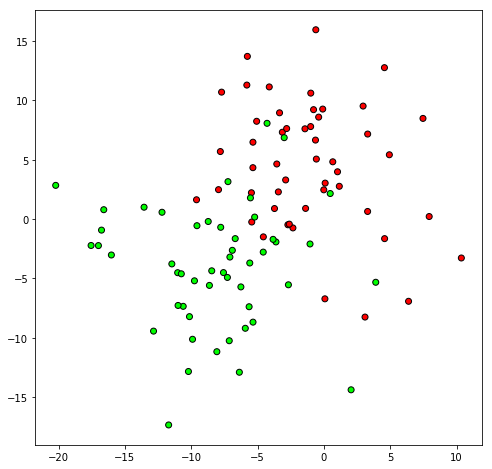

In [5]:
colors = ListedColormap(['#ff0000', '#00ff00'])
xs, ys = np.hsplit(blobs[0], 2)

plt.figure(figsize(8, 8))
plt.scatter(xs.flatten(), ys.flatten(), c=blobs[1], cmap=colors, edgecolors='black')

In [6]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size=0.3,
                                                                                    random_state=1)

### Линейная классификация

#### RidgeClassifier

In [7]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [8]:
#обучение классификатора
ridge_classifier.fit(train_X, train_y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001)

In [9]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_X)

In [10]:
print(test_y)
print(ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [11]:
#оценка качества классификации
metrics.accuracy_score(test_y, ridge_predictions)

0.8666666666666667

In [12]:
a1, a2 = ridge_classifier.coef_[0]
print(a1, a2)

-0.08544430019151406 -0.0727321925662427


In [13]:
a0 = float(ridge_classifier.intercept_)
print(a0)

-0.31250722593373725


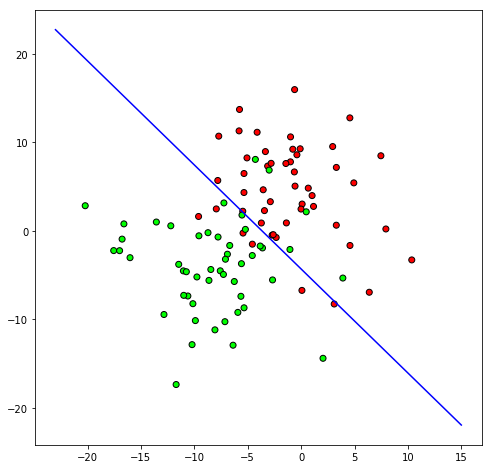

In [14]:
plt.scatter(xs.flatten(), ys.flatten(), c=blobs[1], cmap=colors, edgecolors='black')

x = np.array([-23, 15])
y = (-a0 - a1 * x) / a2
plt.plot(x, y, color='#0000ff')

#### LogisticRegression

In [15]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [16]:
log_regressor.fit(train_X, train_y)

d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr_predictions = log_regressor.predict(test_X)

In [18]:
lr_proba_predictions = log_regressor.predict_proba(test_X)

In [20]:
print(test_y)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [22]:
print(lr_predictions)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [21]:
print(lr_proba_predictions)

[[0.99873457 0.00126543]
 [0.38956803 0.61043197]
 [0.45000737 0.54999263]
 [0.00536816 0.99463184]
 [0.70965944 0.29034056]
 [0.23304944 0.76695056]
 [0.98983143 0.01016857]
 [0.9709671  0.0290329 ]
 [0.93909394 0.06090606]
 [0.15103335 0.84896665]
 [0.90324667 0.09675333]
 [0.0100448  0.9899552 ]
 [0.82338574 0.17661426]
 [0.05238427 0.94761573]
 [0.00443451 0.99556549]
 [0.00102911 0.99897089]
 [0.20817393 0.79182607]
 [0.91074564 0.08925436]
 [0.22580526 0.77419474]
 [0.00101709 0.99898291]
 [0.09600944 0.90399056]
 [0.99367624 0.00632376]
 [0.9779897  0.0220103 ]
 [0.29889823 0.70110177]
 [0.00210487 0.99789513]
 [0.00929423 0.99070577]
 [0.2670277  0.7329723 ]
 [0.85210662 0.14789338]
 [0.98871444 0.01128556]
 [0.00407572 0.99592428]]


In [23]:
metrics.accuracy_score(test_y, lr_predictions)

0.8

In [24]:
metrics.accuracy_score(test_y, ridge_predictions)

0.8666666666666667

### Оценка качества по cross-validation

#### cross_val_score

In [28]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring='accuracy', cv=10)

In [29]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring='accuracy', cv=10)

d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [27]:
lr_scoring

array([0.7, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [30]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


In [31]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8700000000000001, max:1.0, min:0.7, std:0.10049875621120892


#### cross_val_score с заданными scorer и cv_strategy

In [32]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [33]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=2)

In [34]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [35]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [36]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.059535236998305825


In [37]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8766666666666667, max:1.0, min:0.7666666666666667, std:0.06155395104206462
